# STEP 1: READ AND UNDERSTAND DATA

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe

df.shape

(730, 16)

In [6]:
# checking the missing value3

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Check for the null value

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Renaming few columns better understanding

df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
#Check head after renaming
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Copy the dataframe into new

df_copy = df.copy()

In [12]:
#Check the shape of new dataframe

df_copy.shape

(730, 16)

In [13]:
#Drop the duplicates

df_copy.drop_duplicates(inplace=True)

In [14]:
# Shape of new dataframe after dropping duplicates

df_copy.shape

(730, 16)

In [15]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be understood by year and month column,
# casual and registered is the breakup by category for cnt column.

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
# Mapping the season column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# Mapping the month column

df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [18]:
# Mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
# Mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
#Check the head of dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
#Check the head of dataset

df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# STEP 2: VISUALISING THE DATA

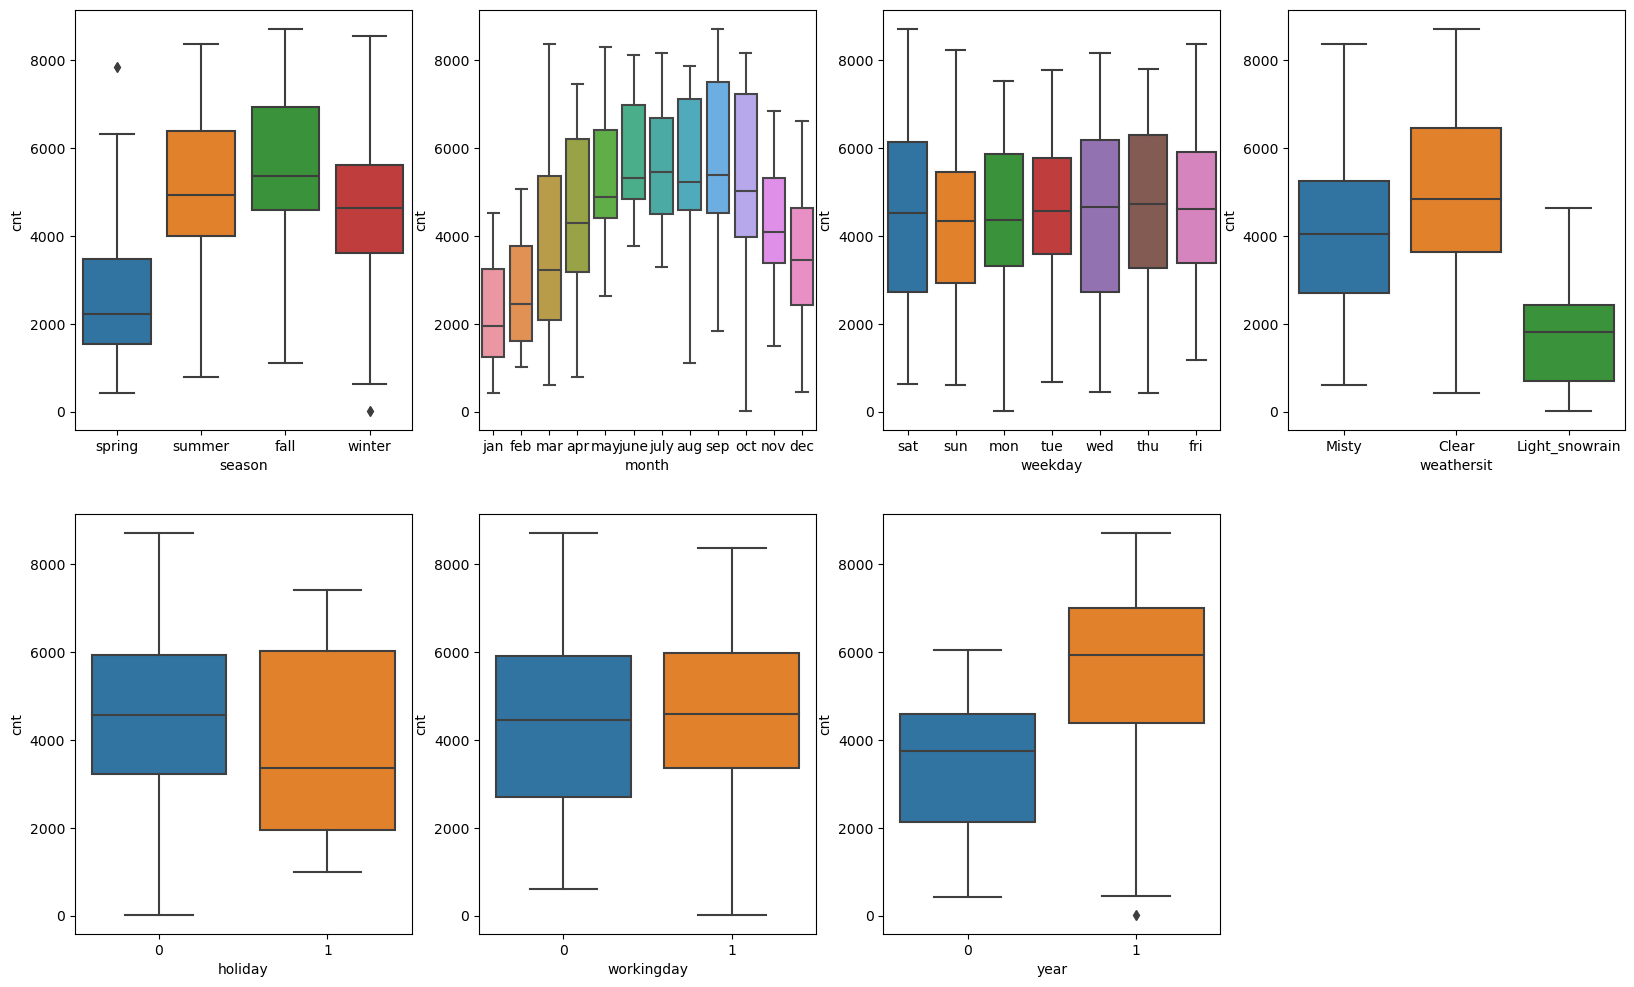

In [22]:
# Visualizing the categorical columns
# Check predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df)
plt.show()

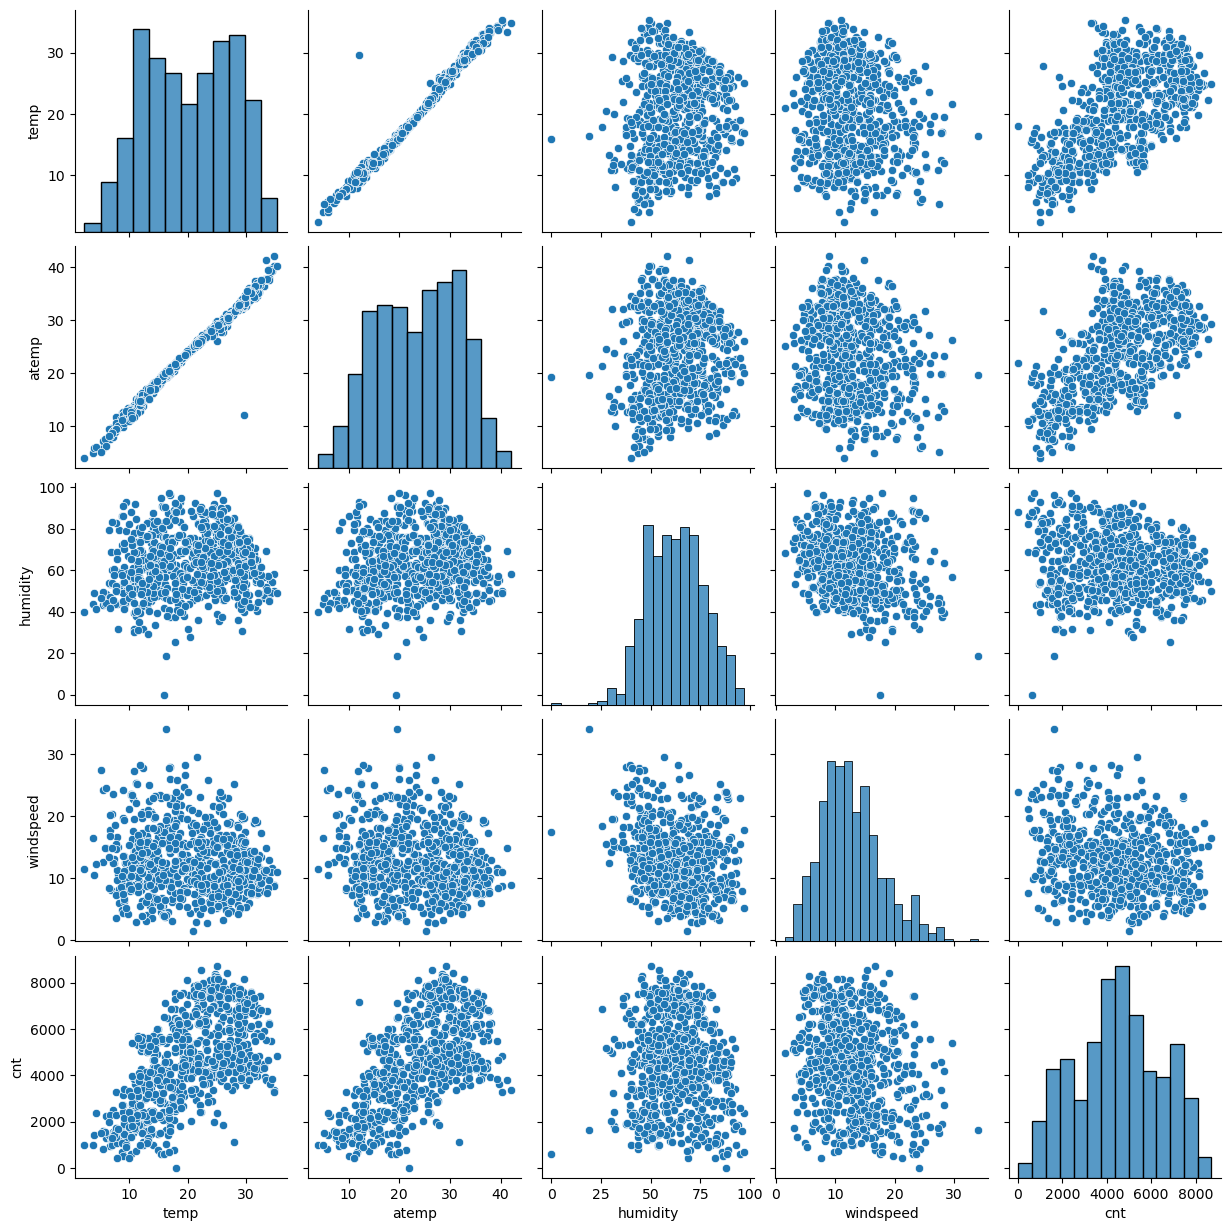

In [23]:
# Visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

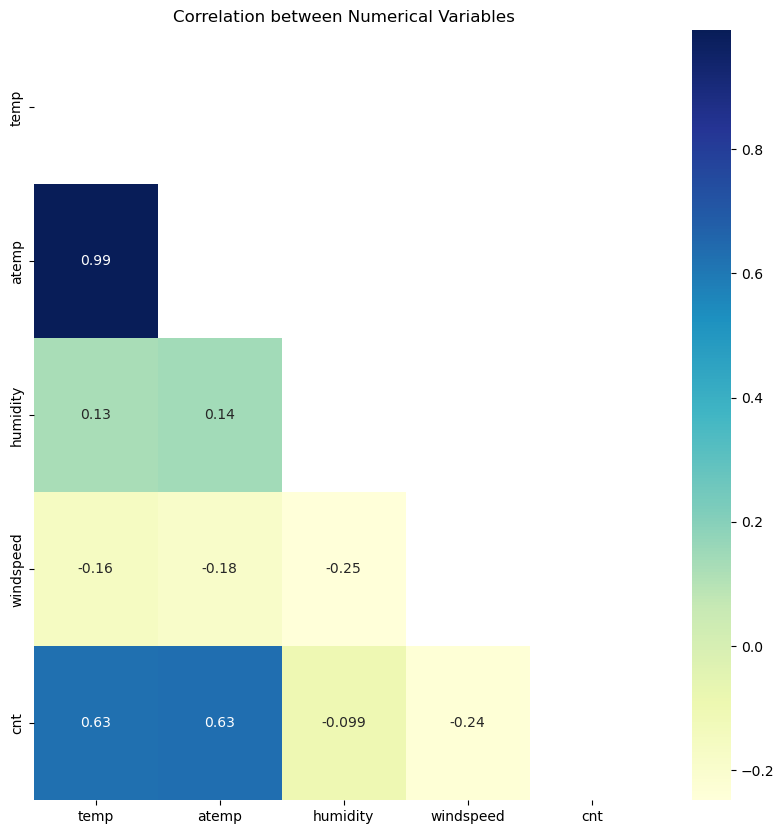

In [24]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (10,10))
matrix = np.triu(df[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

# There is linear relationship between temp and atemp. 
#Both of the parameters cannot be used in the model due to multicolinearity. 

# STEP 3: DATA PREPRATION 

In [25]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [26]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Merging  the dataframe, with the dummy variable dataset. 

df_new = pd.concat([df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [28]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [30]:
# Drop unnecessary columns already created dummy variable out of it.

df_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [32]:
df_new.shape

(730, 30)

In [33]:
df_new.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

# Step 4: Splitting the Data into Training and Testing Sets

In [34]:
#Split the dataframe into Train and Test
np.random.seed(0)
df_train, df_test = train_test_split(df_new,train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [35]:
df_train.shape

(510, 30)

In [36]:
df_test.shape

(220, 30)

In [37]:
#MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [38]:
#Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [39]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


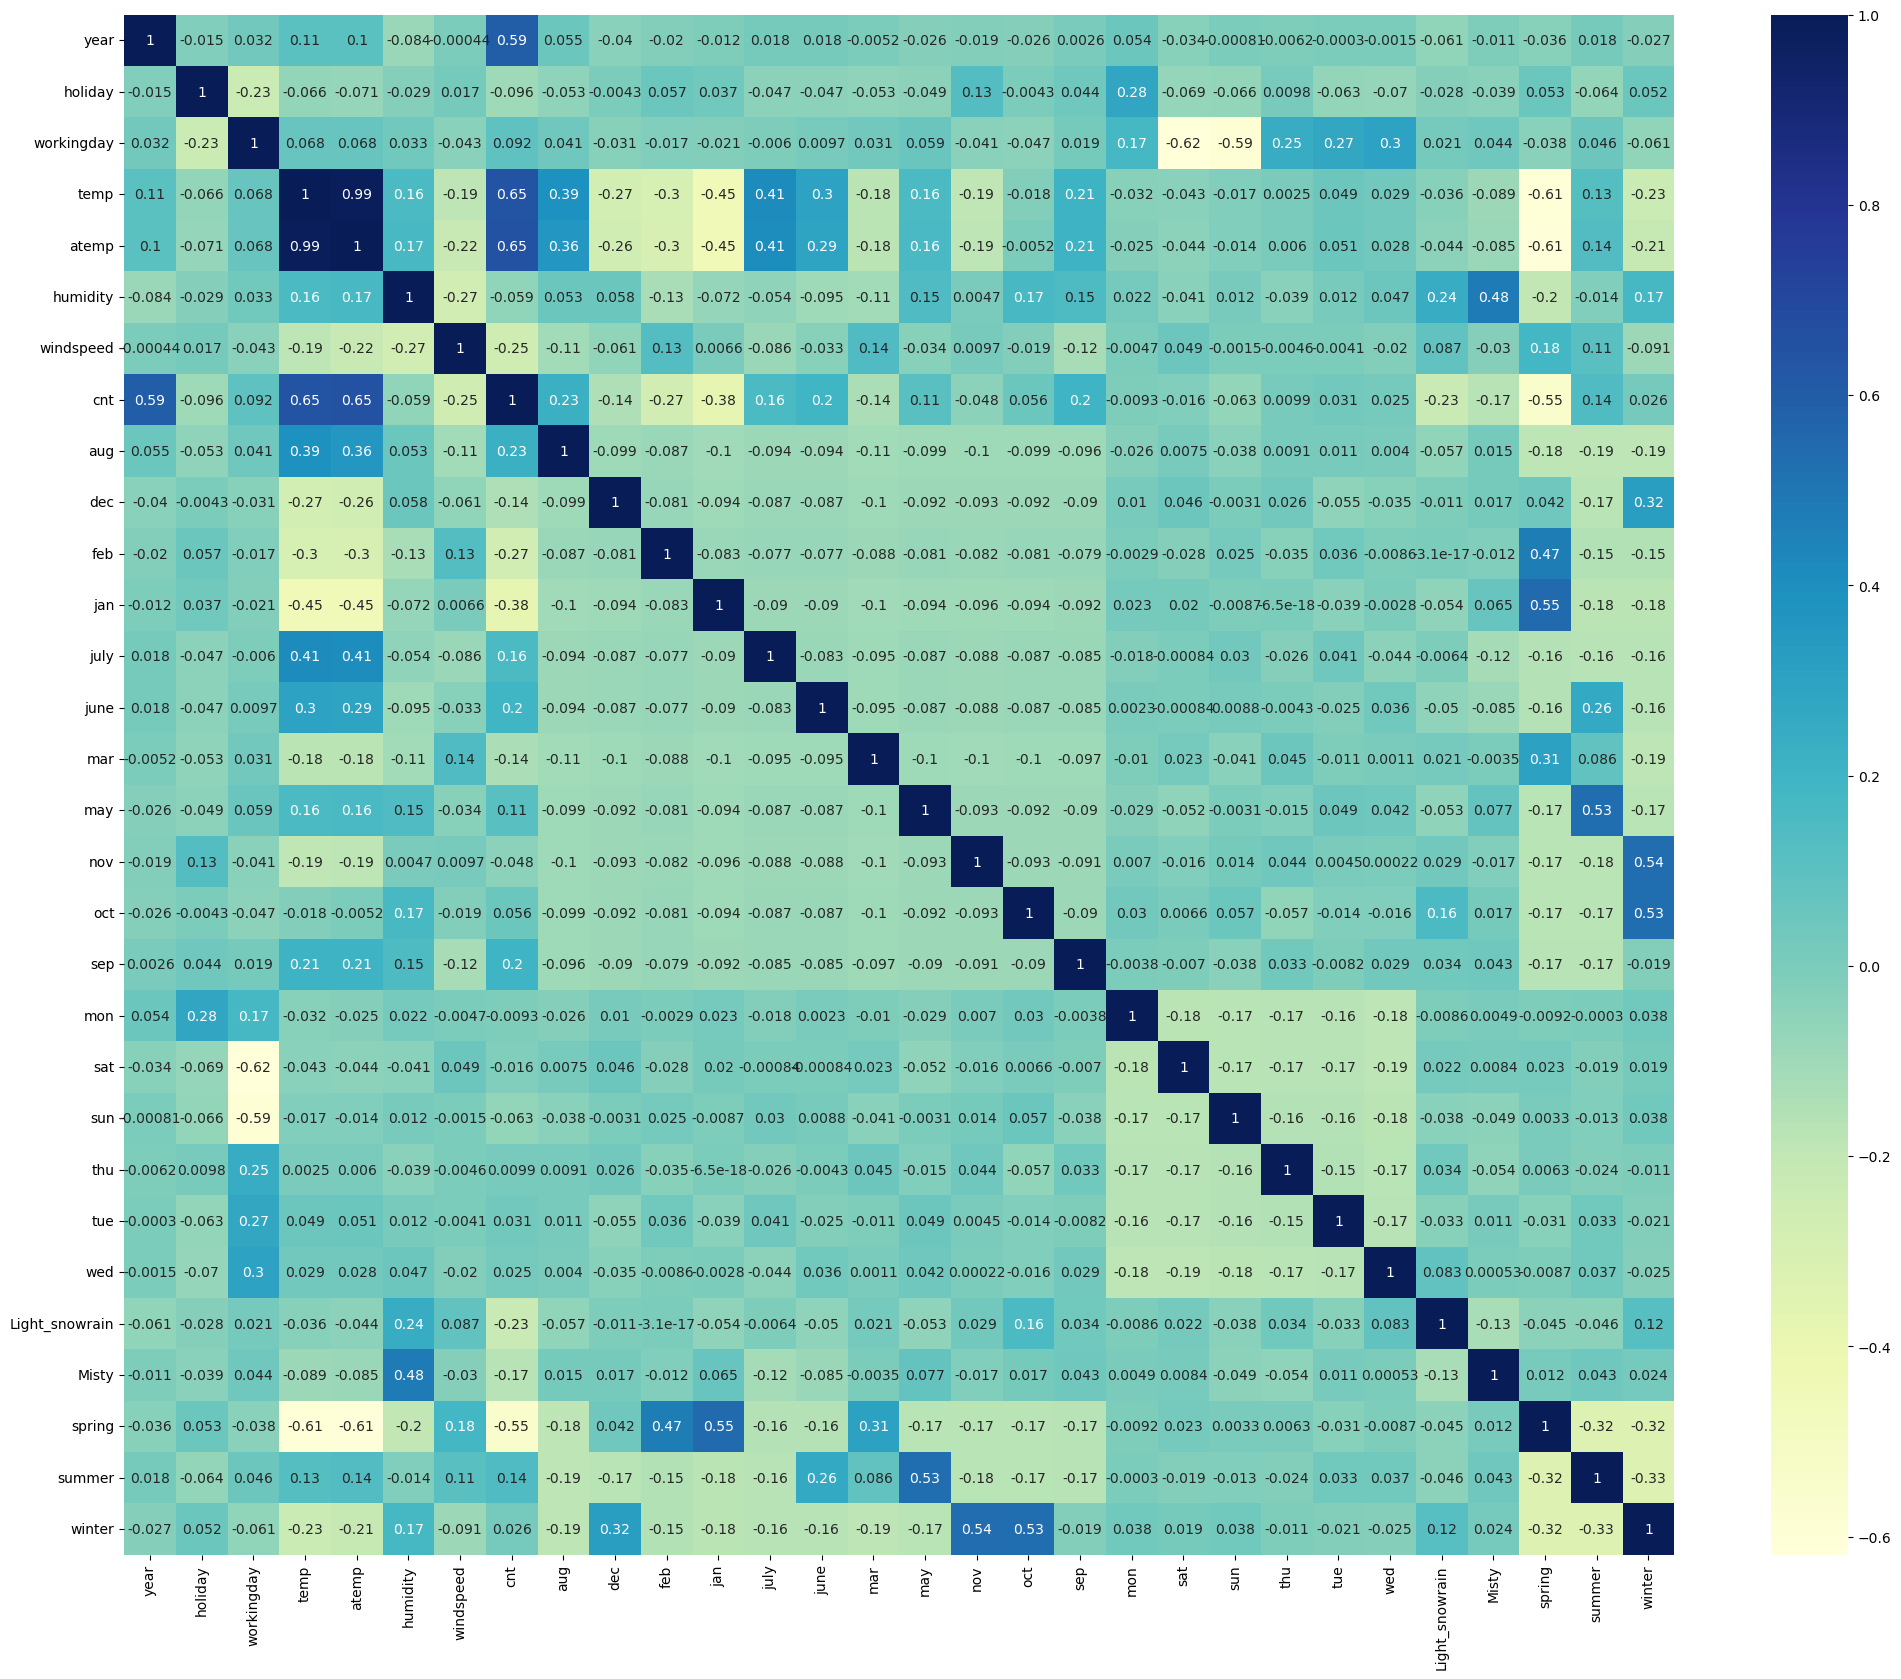

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

# INFERENCE
'cnt' Have correlation with year variable and temp.
'Misty' and 'Humidity' show correlation. 
'Spring' season with 'Jan' and 'Feb' month show good correlation.
'Summer' season with 'May' month show good correlation.
'Winter' season with 'Oct' and 'Nov' month show good correlation.

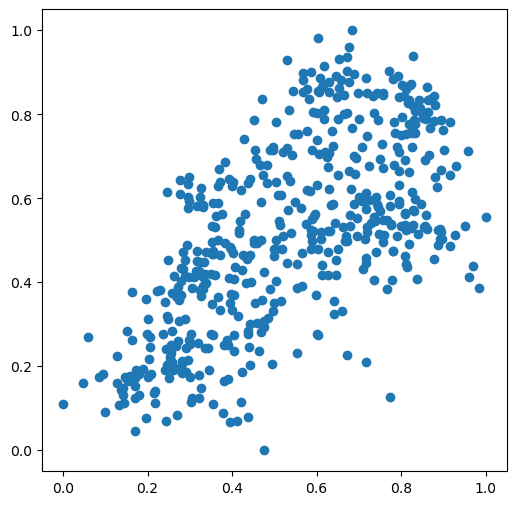

In [41]:
# Visualizing one of the correlation see via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Confirms the positive correlation between temp and cnt.

In [42]:
# Create X and y

y_train = df_train.pop("cnt")
X_train = df_train

In [43]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [44]:
lm=LinearRegression() 
lm.fit(X_train, y_train) 
# Create an RFE model and fit it to the training data 
rfe = RFE(lm, n_features_to_select=15) 
rfe=rfe.fit(X_train, y_train)

In [45]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', True, 1),
 ('dec', False, 6),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', False, 10),
 ('june', False, 5),
 ('mar', False, 11),
 ('may', False, 4),
 ('nov', False, 7),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 13),
 ('wed', False, 14),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', False, 15),
 ('summer', True, 1),
 ('winter', True, 1)]

In [46]:
#Select the selected variable via RFE

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'aug',
       'jan', 'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'summer',
       'winter'],
      dtype='object')


In [47]:
#Check rejected column

X_train.columns[~rfe.support_] 

Index(['atemp', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'spring'],
      dtype='object')

In [48]:
X_train_rfe = X_train[col]

In [49]:
#BUILDING MODEL USING STATSMODEL:

X_train_sm=sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          2.81e-180
Time:                        20:52:29   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2433      0.035      6.887      0.000       0.174       0.313
year               0.2325      0.008     28.794      0.000       0.217       0.248
holiday            0.0109      0.024      0.451      0.652      -0.037       0.058
workingday         0.0963      0.012      7.835      0.000       0.072       0.120
temp               0.3880      0.142      2.727      0.007       0.108       0.668
atemp              0.0590      0.138      0.426      0.670      -0.213       0.331
humidity          -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed         -0.1836      0.026     -6.962      0.000      -0.235      -0.132
aug                0.0223      0.034      0.657      0.511      -0.044       0.089
dec               -0.0443      0.034     -1.316      0.189      -0.110       0.022
feb               -0.0323      0.033     -0.980      0.327      -0.097       0.032
jan               -0.0631      0.034     -1.876      0.061      -0.129       0.003
july              -0.0327      0.035     -0.931      0.352      -0.102       0.036
june               0.0060      0.025      0.241      0.810      -0.043       0.055
mar                0.0016      0.025      0.063      0.950      -0.047       0.050
may                0.0255      0.021      1.208      0.228      -0.016       0.067
nov               -0.0398      0.036     -1.093      0.275      -0.111       0.032
oct                0.0077      0.036      0.215      0.830      -0.063       0.078
sep                0.0868      0.032      2.711      0.007       0.024       0.150
mon               -0.0216      0.015     -1.401      0.162      -0.052       0.009
sat                0.0952      0.014      6.910      0.000       0.068       0.122
sun                0.0410      0.014      2.929      0.004       0.013       0.068
thu               -0.0097      0.016     -0.623      0.534      -0.040       0.021
tue               -0.0184      0.016     -1.184      0.237      -0.049       0.012
wed               -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light_snowrain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Misty             -0.0595      0.010     -5.701      0.000      -0.080      -0.039
spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer             0.0424      0.026      1.617      0.107      -0.009       0.094
winter             0.1071      0.028      3.826      0.000       0.052       0.162
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                   

In [50]:
#Drop holiday because the p value is high
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

# Step 5: BUILDING A LINEAR MODEL

In [51]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.01e-191
Time:                        20:52:29   Log-Likelihood:                 518.38
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1493      0.037      4.

In [52]:
#Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,27.03
1,workingday,16.02
2,temp,12.26
4,windspeed,4.35
8,sat,4.35
9,sun,4.25
11,Misty,2.22
0,year,2.07
13,winter,2.06
12,summer,1.97


In [53]:
#Drop humidity because the value of VIF is high
X_train_rfe=X_train_rfe.drop(['jan'],axis=1)

In [54]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          6.92e-192
Time:                        20:52:29   Log-Likelihood:                 515.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -944.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1306      0.036      3.

In [55]:
#Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.22
1,workingday,15.43
2,temp,10.05
4,windspeed,4.35
7,sat,4.20
8,sun,4.15
10,Misty,2.21
0,year,2.05
11,summer,1.82
12,winter,1.75


In [56]:
#Drop sun because the value of p 
X_train_rfe=X_train_rfe.drop(['sun'],axis=1)

In [57]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_rfe)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          4.37e-192
Time:                        20:52:29   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1780      0.028      6.

In [58]:
#Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,16.03
2,temp,9.76
1,workingday,4.53
4,windspeed,3.76
9,Misty,2.12
0,year,2.02
10,summer,1.82
7,sat,1.79
11,winter,1.75
5,aug,1.59


In [59]:
#Drop columns which has higher VIF
X_train_rfe=X_train_rfe.drop(['humidity'],axis=1)

In [60]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_rfe)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          4.31e-189
Time:                        20:52:29   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0809      0.019      4.

In [61]:
#Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.10
1,workingday,4.04
3,windspeed,3.49
0,year,2.02
9,summer,1.82
6,sat,1.69
4,aug,1.58
8,Misty,1.54
10,winter,1.51
5,sep,1.30


In [62]:

X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [63]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_rfe)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.6
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          3.60e-185
Time:                        20:52:29   Log-Likelihood:                 491.56
No. Observations:                 510   AIC:                            -961.1
Df Residuals:                     499   BIC:                            -914.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1225      0.017      7.

In [64]:
#Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.03
2,windspeed,3.14
0,year,2.00
8,summer,1.81
3,aug,1.58
7,Misty,1.49
9,winter,1.48
4,sep,1.30
5,sat,1.18
6,Light_snowrain,1.08


In [65]:

X_train_rfe=X_train_rfe.drop(['sat'],axis=1)

In [66]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_rfe)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     269.9
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.26e-185
Time:                        20:52:29   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     500   BIC:                            -917.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1260      0.017      7.

In [67]:
#Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.01
2,windspeed,3.08
0,year,2.00
7,summer,1.81
3,aug,1.58
6,Misty,1.49
8,winter,1.48
4,sep,1.30
5,Light_snowrain,1.08


In [68]:
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [69]:
# Building 7th linear regression model

X_train_lm_7 = sm.add_constant(X_train_rfe)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 20 Nov 2023   Prob (F-statistic):          1.86e-179
Time:                        20:52:30   Log-Likelihood:                 472.29
No. Observations:                 510   AIC:                            -926.6
Df Residuals:                     501   BIC:                            -888.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0641      0.014      4.

In [70]:
#Calculate VIF of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.91
0,year,1.94
6,summer,1.79
2,aug,1.55
7,winter,1.46
5,Misty,1.45
3,sep,1.29
4,Light_snowrain,1.06


1.All VIF value is less then 5 so, now there is no multicollinearity in all features.

2.The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

3.A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

4.R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 81.7%

5.The adjusted R-squared adjusts for the number of terms in the model. And we got it around 81.4%

In [71]:
# Checking the parameters and their coefficient values
lr_7.params

const             0.064075
year              0.231618
temp              0.543084
aug               0.060060
sep               0.120870
Light_snowrain   -0.292160
Misty            -0.077891
summer            0.098467
winter            0.144026
dtype: float64

# STEP 6: RESIDUAL ANALYSIS OF TRAIN DATA 

In [72]:
X_train_lm_7

,const,year,temp,aug,sep,Light_snowrain,Misty,summer,winter
576,1.0,1,0.815169,0,0,0,0,0,0
426,1.0,1,0.442393,0,0,0,1,0,0
728,1.0,1,0.245101,0,0,0,0,0,0
482,1.0,1,0.395666,0,0,0,1,1,0
111,1.0,0,0.345824,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
578,1.0,1,0.863973,1,0,0,0,0,0
53,1.0,0,0.202618,0,0,0,0,0,0
350,1.0,0,0.248216,0,0,0,1,0,1
79,1.0,0,0.462664,0,0,0,1,1,0


In [73]:
y_train_pred = lr_7.predict(X_train_lm_7)

Text(0.5, 0, 'Errors')

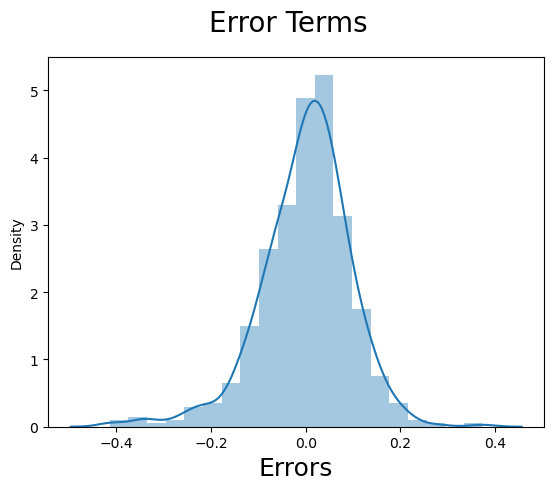

In [74]:
#NORMALITY OF ERROR
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

NORMAL DISTRIBUTION

In [75]:
#Calculate VIF of variables MULTICOLINEARITY

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

calculateVIF(X_train_rfe)

,Features,VIF
1,temp,3.91
0,year,1.94
6,summer,1.79
2,aug,1.55
7,winter,1.46
5,Misty,1.45
3,sep,1.29
4,Light_snowrain,1.06


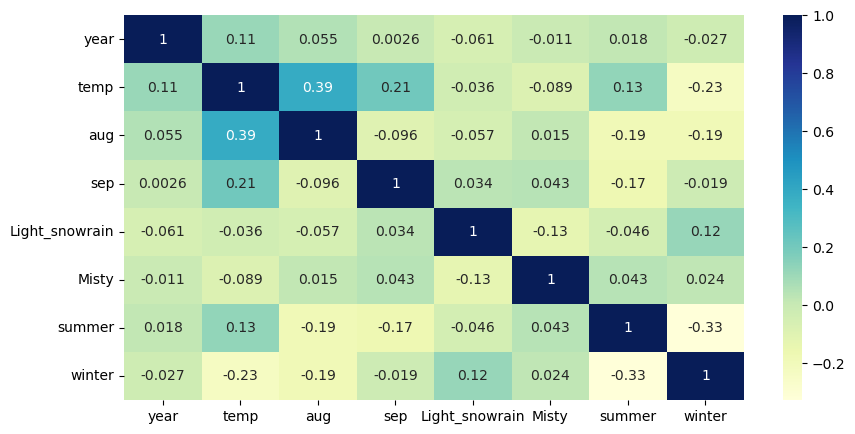

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="YlGnBu")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

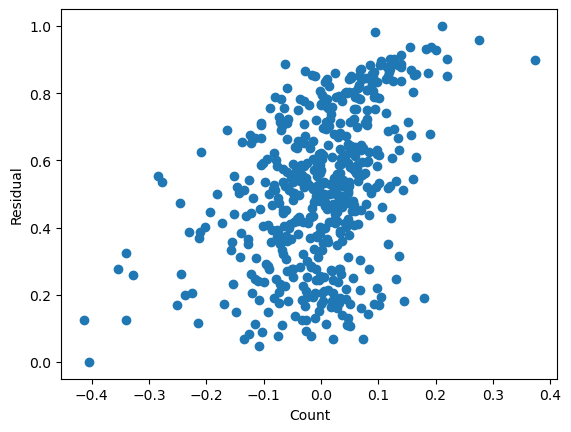

In [77]:
y_train_pred = lr_7.predict(X_train_lm_7)
residual = y_train - y_train_pred
#sns.scatterplot(y_train,residual)
plt.scatter(residual,y_train)

#plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [78]:
y_train_pred = lr_7.predict(X_train_lm_7)
residual = y_train - y_train_pred

# STEP 7: MAKING PREDICTION USING FINAL MODEL

In [79]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [80]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
# Adding constant variable to test dataframe
X_test_lm_7 = X_test[X_train_rfe.columns]
X_test_lm_7 = sm.add_constant(X_test_lm_7)
X_test_lm_7.head()

,const,year,temp,aug,sep,Light_snowrain,Misty,summer,winter
184,1.0,0,0.831783,0,0,0,1,0,0
535,1.0,1,0.901354,0,0,0,0,1,0
299,1.0,0,0.511964,0,0,0,1,0,1
221,1.0,0,0.881625,1,0,0,0,0,0
152,1.0,0,0.817246,0,0,0,0,1,0


In [83]:
X_train_rfe.columns


Index(['year', 'temp', 'aug', 'sep', 'Light_snowrain', 'Misty', 'summer',
       'winter'],
      dtype='object')

In [84]:
#predict
y_test_pred=lr_7.predict(X_test_lm_7)


# STEP 8: MODEL EVALUATION

Text(0, 0.5, 'y_pred')

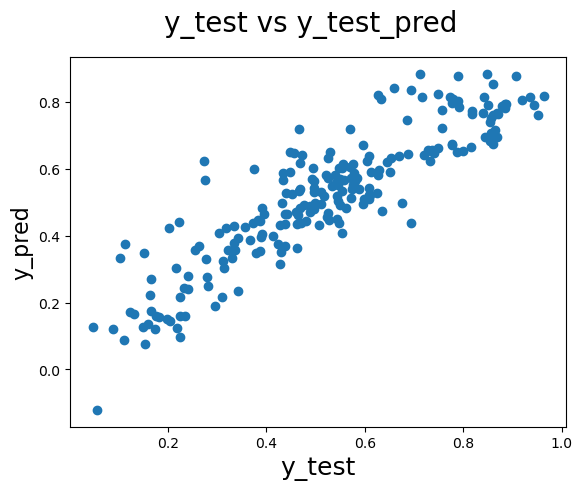

In [85]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We have a model that seems good enough to predict demand of bikes. 
The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [86]:
#Calculate the r square for test

r2 = r2_score(y_test, y_test_pred)
r2


0.7950812692944378

In [87]:
# Calculating Adjusted-R^2 value for the test dataset
Adj_r2 = 1 - (1-r2_score(y_test, y_test_pred)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print(Adj_r2)

0.7873118387463596


In [88]:
round(lr_7.params,4)

const             0.0641
year              0.2316
temp              0.5431
aug               0.0601
sep               0.1209
Light_snowrain   -0.2922
Misty            -0.0779
summer            0.0985
winter            0.1440
dtype: float64

# We can see that the equation of our best fitted line is:

cnt= 0.0641+ 0.2316 x year + 0.5431 x temp + 0.0601 x aug + 0.1209 x sep -0.2922 x light_snowrain - 0.0779 x misty + 0.0985 x summer +0.1440 x winter 

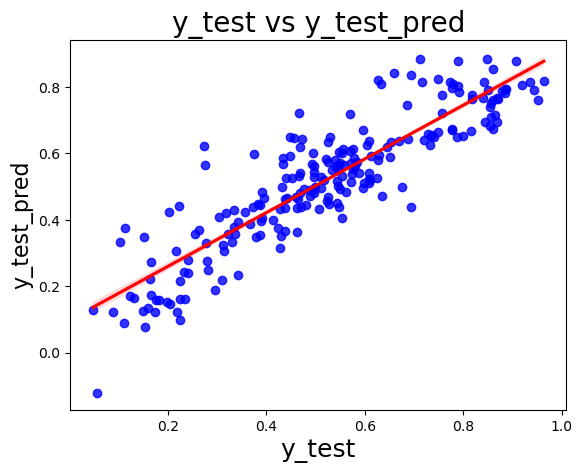

In [89]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.817
- Test dataset R^2           : 0.795
- Train dataset Adjusted R^2 : 0.814   
- Test dataset Adjusted R^2  : 0.787

Demand of bikes depend on year, temp, aug, sep, Light_snowrain, Misty, summer and winter.